In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%cd /home/tmb/exp/ocropus4

/home/tmb/exp/ocropus4


In [4]:
import ocrodeg
import webdataset as wds
from ocrlib import segmentation_targets, patch_extraction
from itertools import islice
from importlib import reload

In [5]:
ds = wds.WebDataset("data/uw3-tess.tgz")
sample = next(iter(ds))

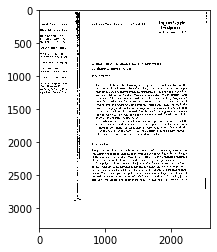

In [6]:
imshow(sample["png"])

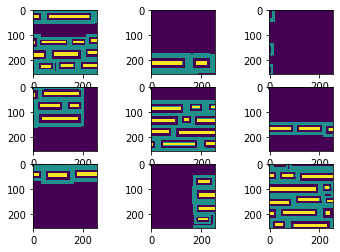

In [15]:
from ocrlib import augmentations
reload(augmentations)
extra = {}
patches = list(augmentations.segmentation_patches(sample, extra=extra))
count = 0
for i, loc, (im, s) in patches[:9]:
    count += 1
    subplot(3, 3, count)
    imshow(s)

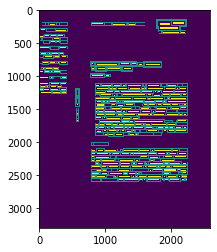

In [14]:
imshow(extra["seg"])

In [13]:
import webdataset
from webdataset import writer
!rm foo.tgz
ds = writer.TarWriter("foo.tgz")
ds.write(dict(__key__="x"*80, txt="y"*80))
ds.close()
!ls -l foo.tgz
!tar -ztvf foo.tgz

-rw-r--r-- 1 tmb tmb 121 Feb  4 10:35 foo.tgz
gzip: warning: GZIP environment variable is deprecated; use an alias or script
-r--r--r-- bigdata/bigdata  80 2020-02-04 10:35 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx.txt


In [14]:
import webdataset
from webdataset import writer
!rm foo.tgz
with writer.TarWriter("foo.tgz") as ds:
    ds.write(dict(__key__="x"*80, txt="y"*80))
!ls -l foo.tgz
!tar -ztvf foo.tgz

-rw-r--r-- 1 tmb tmb 121 Feb  4 10:36 foo.tgz
gzip: warning: GZIP environment variable is deprecated; use an alias or script
-r--r--r-- bigdata/bigdata  80 2020-02-04 10:36 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx.txt


In [15]:
import webdataset
from webdataset import writer
ds = writer.TarWriter("foo.tar")
ds.write(dict(__key__="x"*80, txt="y"*80))
ds.close()
!ls -l foo.tar
!tar -tvf foo.tar

-rw-r--r-- 1 tmb tmb 10240 Feb  4 10:36 foo.tar
-r--r--r-- bigdata/bigdata  80 2020-02-04 10:36 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx.txt


In [16]:
import webdataset
from webdataset import writer
!rm -f foo.tar
with writer.TarWriter("foo.tar") as ds:
    ds.write(dict(__key__="x"*80, txt="y"*80))
!ls -l foo.tar
!tar -tvf foo.tar

-rw-r--r-- 1 tmb tmb 10240 Feb  4 10:36 foo.tar
-r--r--r-- bigdata/bigdata  80 2020-02-04 10:36 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx.txt
